In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
text = """Foundation models, now powering most of the exciting applications in deep learning, are almost universally based on the Transformer architecture and its core attention module. Many subquadratic-time architectures such as linear attention, gated convolution and recurrent models, and structured state space models (SSMs)have been developed to address Transformers’ computational inefficiency on long sequences, but they have not performed as well as attention on important modalities such as language. We identify that a key weakness of such models is their inability to perform content-based reasoning, and make several improvements. First, simply letting the SSM parameters be functions of the input addresses their weakness with discrete modalities, allowing the model to selectively propagate or forget information along the sequence length dimension depending on the current token. Second, even though this change prevents the use of efficient convolutions, we design a hardware-aware parallel algorithm in recurrent mode. We integrate these selective SSMs into a simplified end-to-end neural network architecture without attention or even MLP blocks (Mamba). Mamba enjoys fastinference (5× higher throughput than Transformers) and linear scaling in sequence length, and its performance improves on real data up to million-length sequences. As a general sequence model backbone, Mamba achieves state-of-the-art performance across several modalities such as language, audio, and genomics. On language modeling, our Mamba-3B model outperforms Transformers of the same size and matches Transformers twice its size, both in pretraining and downstream evaluation.
"""

# Tokenizing

In [2]:
# dzielenie tekstu na zdania
sentences = sent_tokenize(text)
sentence = sentences[0]
tokens = nltk.word_tokenize(sentences[0])
tags = nltk.pos_tag(tokens)
chunks = nltk.ne_chunk(tags)

# Wyświetlenie drzewa składniowego
chunks.draw()


Częstotliwość słów:
<FreqDist with 161 samples and 264 outcomes>


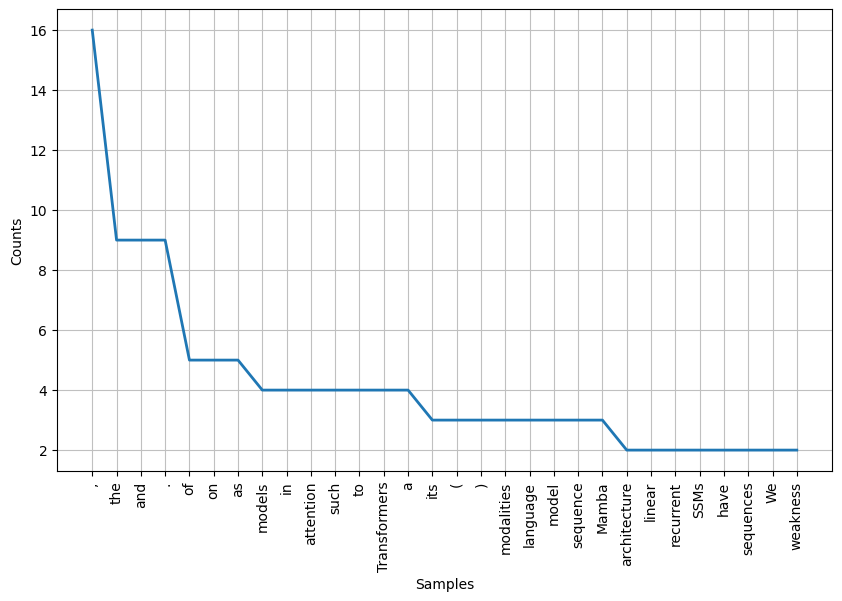


Top 5 słów:
[(',', 16), ('the', 9), ('and', 9), ('.', 9), ('of', 5)]

Słowa po stemmingu: [264]
['foundat', 'model', ',', 'now', 'power', 'most', 'of', 'the', 'excit', 'applic', 'in', 'deep', 'learn', ',', 'are', 'almost', 'univers', 'base', 'on', 'the', 'transform', 'architectur', 'and', 'it', 'core', 'attent', 'modul', '.', 'mani', 'subquadratic-tim', 'architectur', 'such', 'as', 'linear', 'attent', ',', 'gate', 'convolut', 'and', 'recurr', 'model', ',', 'and', 'structur', 'state', 'space', 'model', '(', 'ssm', ')', 'have', 'been', 'develop', 'to', 'address', 'transform', '’', 'comput', 'ineffici', 'on', 'long', 'sequenc', ',', 'but', 'they', 'have', 'not', 'perform', 'as', 'well', 'as', 'attent', 'on', 'import', 'modal', 'such', 'as', 'languag', '.', 'we', 'identifi', 'that', 'a', 'key', 'weak', 'of', 'such', 'model', 'is', 'their', 'inabl', 'to', 'perform', 'content-bas', 'reason', ',', 'and', 'make', 'sever', 'improv', '.', 'first', ',', 'simpli', 'let', 'the', 'ssm', 'paramet', 

In [3]:
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Tokenizacja
tokens = word_tokenize(text)

# Analiza częstotliwości słów
fdist = FreqDist(tokens)
print("Częstotliwość słów:")
print(fdist)

plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.show()

# Wybierz 5 najczęściej występujących słów
top_words = fdist.most_common(5)
print("\nTop 5 słów:")
print(top_words)

# Stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in tokens]
print(f"\nSłowa po stemmingu: {[len(stemmed_words)]}")
print(stemmed_words)

# Usunięcie stopwords (często występujących słów, które nie wniosą wiele do analizy)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(f"Tokens after stopwords removal: {[len(filtered_tokens)]}")
print(filtered_tokens)


In [4]:
from nltk.stem import WordNetLemmatizer

# Lemmatyzacja (redukcja słów do ich podstawowej formy)
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
print("\nWords after lemmatization:")
print(lemmatized_words)


Words after lemmatization:
['Foundation', 'model', ',', 'now', 'powering', 'most', 'of', 'the', 'exciting', 'application', 'in', 'deep', 'learning', ',', 'are', 'almost', 'universally', 'based', 'on', 'the', 'Transformer', 'architecture', 'and', 'it', 'core', 'attention', 'module', '.', 'Many', 'subquadratic-time', 'architecture', 'such', 'a', 'linear', 'attention', ',', 'gated', 'convolution', 'and', 'recurrent', 'model', ',', 'and', 'structured', 'state', 'space', 'model', '(', 'SSMs', ')', 'have', 'been', 'developed', 'to', 'address', 'Transformers', '’', 'computational', 'inefficiency', 'on', 'long', 'sequence', ',', 'but', 'they', 'have', 'not', 'performed', 'a', 'well', 'a', 'attention', 'on', 'important', 'modality', 'such', 'a', 'language', '.', 'We', 'identify', 'that', 'a', 'key', 'weakness', 'of', 'such', 'model', 'is', 'their', 'inability', 'to', 'perform', 'content-based', 'reasoning', ',', 'and', 'make', 'several', 'improvement', '.', 'First', ',', 'simply', 'letting', '

In [5]:
# Concordance (wyświetlanie kontekstu dla danego słowa)
text = nltk.Text(tokens)
concordance_results = text.concordance("Transformers")

Displaying 4 of 4 matches:
) have been developed to address Transformers ’ computational inefficiency on 
ence ( 5× higher throughput than Transformers ) and linear scaling in sequence
, our Mamba-3B model outperforms Transformers of the same size and matches Tra
ers of the same size and matches Transformers twice its size , both in pretrai


### Bigramy i Trigramy w NLP

W **NLP (Natural Language Processing)**, bigramy i trigramy są rodzajem **n-gramów**, które są sekwencjami kolejnych *n* elementów (n-gramów) w tekście, zazwyczaj słów lub znaków.

#### Bigramy:

Bigram to n-gram składający się z **dwóch kolejnych elementów**. W przypadku analizy tekstu, bigramy są używane do tworzenia par sekwencji słów. Na przykład, dla zdania "To jest przykładowe zdanie", bigramy wyglądają następująco:
- (To, jest)
- (jest, przykładowe)
- (przykładowe, zdanie)

Bigramy są przydatne w analizie języka naturalnego, ponieważ pozwalają na analizę kontekstu poprzez badanie występujących obok siebie słów.

#### Trigramy:

Trigram to n-gram składający się z **trzech kolejnych elementów**. W analizie tekstu, trigramy to sekwencje trzech słów (lub znaków) występujących obok siebie. Dla tego samego zdania "To jest przykładowe zdanie", trigramy to:
- (To, jest, przykładowe)
- (jest, przykładowe, zdanie)

Trigramy mogą dostarczać bardziej szczegółowego zrozumienia kontekstu niż bigramy, ponieważ uwzględniają trzy kolejne elementy.

W analizie tekstu, bigramy i trigramy są używane do tworzenia modeli językowych, ekstrakcji informacji, wykrywania wzorców w tekście i wielu innych zastosowań, pozwalając na lepsze zrozumienie struktury i znaczenia tekstu.

In [6]:
from nltk import ngrams

# Tworzenie bigramów i trigramów
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

print("Bigrams:")
print(bigrams)
print()
print("\nTrigrams:")
print(trigrams)

Bigrams:
[('Foundation', 'models'), ('models', ','), (',', 'now'), ('now', 'powering'), ('powering', 'most'), ('most', 'of'), ('of', 'the'), ('the', 'exciting'), ('exciting', 'applications'), ('applications', 'in'), ('in', 'deep'), ('deep', 'learning'), ('learning', ','), (',', 'are'), ('are', 'almost'), ('almost', 'universally'), ('universally', 'based'), ('based', 'on'), ('on', 'the'), ('the', 'Transformer'), ('Transformer', 'architecture'), ('architecture', 'and'), ('and', 'its'), ('its', 'core'), ('core', 'attention'), ('attention', 'module'), ('module', '.'), ('.', 'Many'), ('Many', 'subquadratic-time'), ('subquadratic-time', 'architectures'), ('architectures', 'such'), ('such', 'as'), ('as', 'linear'), ('linear', 'attention'), ('attention', ','), (',', 'gated'), ('gated', 'convolution'), ('convolution', 'and'), ('and', 'recurrent'), ('recurrent', 'models'), ('models', ','), (',', 'and'), ('and', 'structured'), ('structured', 'state'), ('state', 'space'), ('space', 'models'), ('mo

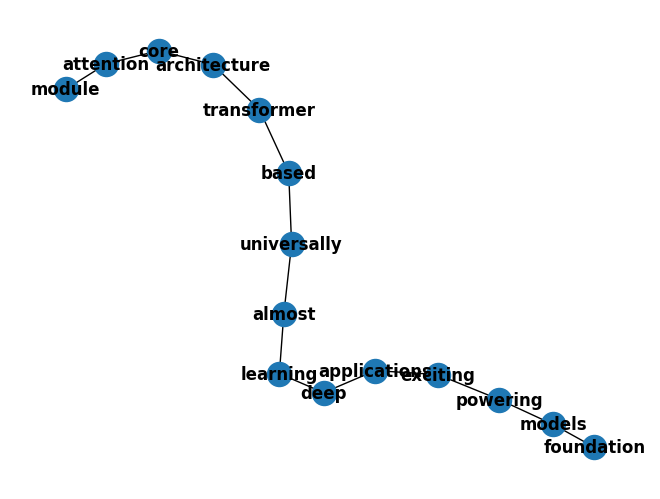


Analiza stopni wierzchołków (degree) dla znalezienia słów kluczowych:
['models', 'powering', 'exciting', 'applications', 'deep', 'learning', 'almost', 'universally', 'based', 'transformer', 'architecture', 'core', 'attention']


In [7]:
import networkx as nx
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]

word_graph = nx.Graph()
for i in range(len(words)-1):
    word_graph.add_edge(words[i], words[i+1])


degrees = dict(word_graph.degree())
key_words = [word for word, degree in degrees.items() if degree > 1]


pos = nx.spring_layout(word_graph)
nx.draw(word_graph, pos, with_labels=True, font_weight='bold')
plt.show()

print("\nAnaliza stopni wierzchołków (degree) dla znalezienia słów kluczowych:")
print(key_words)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kobala/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


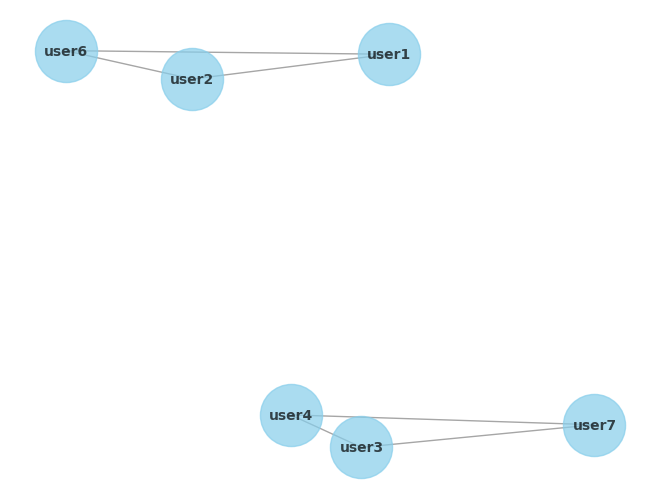

In [8]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

social_media_data = {
    'user1': 'The quality of this product exceeds my expectations!',
    'user2': 'The service provided was subpar.',
    'user3': 'Absolutely thrilled with the experience!',
    'user4': 'This is absolutely fantastic.',
    'user6': 'Not what I anticipated from the product.',
    'user7': 'The service needs improvement.',
}

sia = SentimentIntensityAnalyzer()

G = nx.Graph()

for user1, comment1 in social_media_data.items():
    for user2, comment2 in social_media_data.items():
        if user1 != user2:
            sentiment1 = sia.polarity_scores(comment1)['compound']
            sentiment2 = sia.polarity_scores(comment2)['compound']

            if abs(sentiment1 - sentiment2) < 0.3:
                G.add_edge(user1, user2, sentiment=sentiment1)

pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color='skyblue',
    node_size=2000,
    font_size=10,
    font_color='black',
    font_weight='bold',
    edge_color='gray',
    linewidths=1,
    alpha=0.7
)

plt.show()